In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

###The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $\$ $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV (target) - Median value of owner-occupied homes in $1000's

In [2]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     dados = load_boston(return_X_y=False)

#### Análise dos dados

In [3]:
X = dados.data
y = dados.target

df = pd.DataFrame(X)
df.columns = dados.feature_names
df['target'] = y
df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Verificando existencia de valores faltosos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:

# Coeficiente de Pearson: funcao perasonr retorna uma tupla, o 
# primeiro elemento é o coeficiente desejado, e o pi value, reflete 
# a confiança nos dados da estatística.

print(' Atributo    Coef. Pearson ' )
for col in df.columns:
    print(' %7s       %6.4f' %(col, pearsonr(df[col],df['target'])[0]))


 Atributo    Coef. Pearson 
    CRIM       -0.3883
      ZN       0.3604
   INDUS       -0.4837
    CHAS       0.1753
     NOX       -0.4273
      RM       0.6954
     AGE       -0.3770
     DIS       0.2499
     RAD       -0.3816
     TAX       -0.4685
 PTRATIO       -0.5078
       B       0.3335
   LSTAT       -0.7377
  target       1.0000


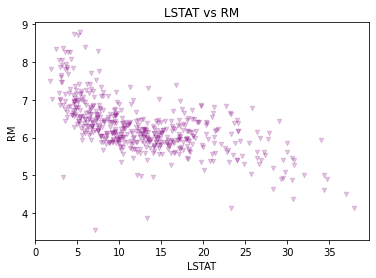

In [6]:
atributo_1 = 'LSTAT'
atributo_2 = 'RM'

df.plot.scatter(x=atributo_1, y= atributo_2,title= atributo_1 +' vs ' + atributo_2, marker='v', alpha=0.2, c='purple')

# Para selecionar as melhores variavies, nao necessariamente as mais correlacionadas
# com o alvo sao as melhores a serem selecionadas, principalmente, se elas já tem
# correlacao entre sí, melhor escolher variaveis que tem pouca correlação.


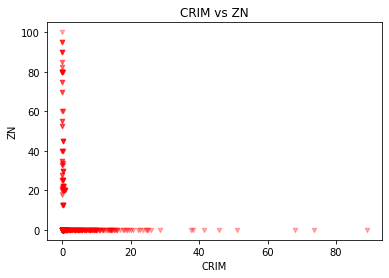

In [7]:
atributo_1 = 'CRIM' #numero de quartos
atributo_2 = 'ZN' 
df.plot.scatter(x=atributo_1, y= atributo_2, title= atributo_1 +' vs ' + atributo_2,  marker='v', alpha=0.3, c='red')
   

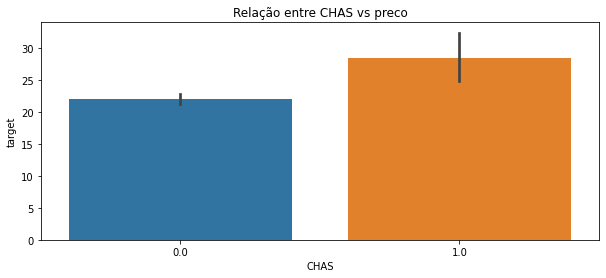

In [8]:
variaveis_discretas = ['CHAS']

for col in variaveis_discretas:
    plt.figure(figsize = (10,4))
    plt.title('Relação entre '+ col+' vs preco')
    sns.barplot(x = col, y = 'target', data = df)
    plt.show()
   
   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


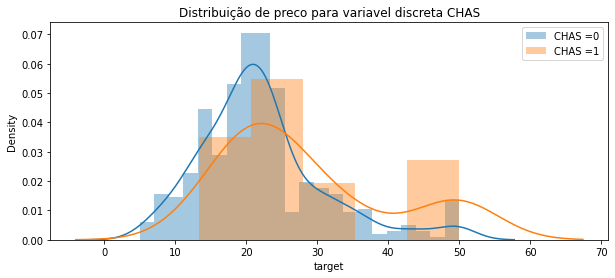

In [9]:
f0 = df[df['CHAS'] == 0]
f1 = df[df['CHAS'] == 1]


plt.figure(figsize = (10,4))
plt.title('Distribuição de preco para variavel discreta CHAS')
sns.distplot(f0['target'], label='CHAS =0')
sns.distplot(f1['target'], label='CHAS =1')
plt.legend()

#### Separação dos dados em conjunto de teste e de treinamento:

In [10]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=12345)

Criação da função para cross validation

In [11]:
from sklearn.model_selection import cross_validate, KFold

def validacao_cruzada(modelo):
  
  kf = KFold(n_splits=10)
  scores = cross_validate(modelo, X_treino, y_treino, cv=kf, scoring='r2', return_train_score=True)
  return scores

#### Criando primeiro modelo regressor MLP utilizando parametros default (otimizador Adam):

In [ ]:
from sklearn.neural_network import MLPRegressor

# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: adam

regr = MLPRegressor(random_state=1234, solver='adam', activation='relu')

score1 = validacao_cruzada(regr)

In [13]:
r2 = score1['test_score'].mean()
desvio = score1['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.52 
Desvio Padrão = 0.091


##### Padronizando os dados

Para ajustar a escala dos atributos, a melhor escolha encontrada foi utilizando StandartScaler.


In [14]:
from sklearn.preprocessing import StandardScaler

# Ajustar a escala dos atributos 

escala = StandardScaler()

escala.fit(X_treino)

X_treino = escala.transform(X_treino)
X_teste = escala.transform(X_teste)

##### Testando o modelo após a normalização dos dados

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: adam

regr = MLPRegressor(random_state=1234, max_iter=200, solver='adam', activation='relu', learning_rate_init= 1e-3)
score1 = validacao_cruzada(regr)

In [16]:
r2 = score1['test_score'].mean()
desvio = score1['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.65 
Desvio Padrão = 0.099


##### Aumentando o numero máximo de iterações.

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: adam

regr = MLPRegressor(random_state=1234, max_iter=3000, solver='adam', activation='relu', learning_rate_init= 1e-3)
score1 = validacao_cruzada(regr)

In [18]:
r2 = score1['test_score'].mean()
desvio = score1['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.87 
Desvio Padrão = 0.071


##### Inclusao de novos parametros no modelo

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: adam 

regr = MLPRegressor(random_state=1234, max_iter=500, 
                     hidden_layer_sizes=(100, 8), solver='adam', activation='relu')

score2 = validacao_cruzada(regr)

In [20]:
r2 = score2['test_score'].mean()
desvio = score2['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.85 
Desvio Padrão = 0.079


##### criando modelo com funcao de ativação logistica

In [ ]:
#logistico é ruim para regressao por se adequar melhor em problemas com saidas binarias.
# função de ativação: logistic -> Pessimo
# funcao de resolucao: adam 

regr = MLPRegressor(random_state=1234, max_iter=500, 
                     hidden_layer_sizes=(100, 8), solver='adam', activation='logistic')

score3 = validacao_cruzada(regr)

In [22]:
r2 = score3['test_score'].mean()
desvio = score3['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = -3.28 
Desvio Padrão = 0.675


#### Criando modelo com função de otimização lbfgs

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: lbfgs 

regr = MLPRegressor(random_state=1234, max_iter=500, solver='lbfgs', activation='relu')

score4 = validacao_cruzada(regr)

In [24]:
r2 = score4['test_score'].mean()
desvio = score4['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.73 
Desvio Padrão = 0.132


##### Modificando o numero de camadas e neurônios

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: lbfgs

regr = MLPRegressor(random_state=1234, max_iter=500, 
                     hidden_layer_sizes=(16, 6), solver='lbfgs', activation='relu')

score4 = validacao_cruzada(regr)

In [26]:
r2 = score4['test_score'].mean()
desvio = score4['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.86 
Desvio Padrão = 0.055


#### Criando modelo com função de otimização sgd

##### Utilizando funcao de ativacao relu

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: sgd

regr = MLPRegressor(random_state=1234, max_iter=500, solver='sgd', activation='relu')
score5 = validacao_cruzada(regr)

In [28]:
r2 = score5['test_score'].mean()
desvio = score5['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.87 
Desvio Padrão = 0.073


##### Utilizando funcao de ativacao tangente hiperbólica

In [ ]:
# função de ativação: tanh
# funcao de resolucao: adam 

regr = MLPRegressor(random_state=1234, max_iter=500, solver='sgd', activation='tanh', learning_rate='adaptive')

score6 = validacao_cruzada(regr)

In [30]:
r2 = score6['test_score'].mean()
desvio = score6['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.84 
Desvio Padrão = 0.066


#### Escolhendo o regressor ajustado com maior acurácia e menor desvio padrão, para aplicar no conjunto de teste.

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: lbfgs

regr = MLPRegressor(random_state=1234, max_iter=500, 
                     hidden_layer_sizes=(16, 5), solver='lbfgs', activation='relu')

score = validacao_cruzada(regr)

In [32]:
r2 = score['test_score'].mean()
desvio = score['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.85 
Desvio Padrão = 0.080


##### Treinando o modelo

In [ ]:
regr.fit(X_treino, y_treino)

y_resposta_treino = regr.predict(X_treino)
y_resposta_teste = regr.predict(X_teste)

In [34]:
# Definindo métrica de cálculo RMSPE

def rmspe(y, y_resposta):
    value = np.sqrt(np.mean(np.square(((y - y_resposta) / y)), axis=0))
    return value

##### Resultados

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import math

mse_in = mean_squared_error(y_treino, y_resposta_treino)
rmse_in = math.sqrt(mse_in)
r2_in = r2_score(y_treino, y_resposta_treino)
rmspe_in = rmspe(y_treino, y_resposta_treino)

mse_out = mean_squared_error(y_teste, y_resposta_teste)
rmse_out = math.sqrt(mse_out)
r2_out = r2_score(y_teste, y_resposta_teste)
rmspe_out = rmspe(y_teste, y_resposta_teste)

print(' Métrica   DENTRO da amostra   FORA da amostra ')
print(' -------   -----------------   --------------- ')

print(' %7s   %17.4f   %15.4f ' % ( 'rmse' , rmse_in, rmse_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'r2' , r2_in, r2_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'rmspe' , rmspe_in, rmspe_out) )

 Métrica   DENTRO da amostra   FORA da amostra 
 -------   -----------------   --------------- 
    rmse              1.6745            3.7946 
      r2              0.9687            0.7755 
   rmspe              0.1065            0.1990 


#### Retirando outliers e aplicando o modelo novamente:

In [36]:
df = pd.DataFrame(X)
df.columns = dados.feature_names
df['target'] = y

In [37]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=12345)

print('xtreino :', len(X_treino))

xtreino : 404


In [38]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors=292,n_jobs=-1)
yhat = LOF.fit_predict(X_treino)

mask = yhat != -1

X_treino = X_treino.loc[mask,:] 
y_treino = y_treino.loc[mask]

print('xtreino :', len(X_treino))

xtreino : 389


In [39]:
escala = StandardScaler()

escala.fit(X_treino)

X_treino = escala.transform(X_treino)
X_teste = escala.transform(X_teste)

In [ ]:
regr = MLPRegressor(random_state=1234, max_iter=500, 
                     hidden_layer_sizes=(16, 5), solver='lbfgs', activation='relu')

score = validacao_cruzada(regr)

In [41]:
r2 = score6['test_score'].mean()
desvio = score6['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.84 
Desvio Padrão = 0.066


In [ ]:
regr.fit(X_treino, y_treino)

y_resposta_treino = regr.predict(X_treino)
y_resposta_teste = regr.predict(X_teste)

Resultados após retirada de outliers

In [43]:
mse_in = mean_squared_error(y_treino, y_resposta_treino)
rmse_in = math.sqrt(mse_in)
r2_in = r2_score(y_treino, y_resposta_treino)
rmspe_in = rmspe(y_treino, y_resposta_treino)

mse_out = mean_squared_error(y_teste, y_resposta_teste)
rmse_out = math.sqrt(mse_out)
r2_out = r2_score(y_teste, y_resposta_teste)
rmspe_out = rmspe(y_teste, y_resposta_teste)

print(' Métrica   DENTRO da amostra   FORA da amostra ')
print(' -------   -----------------   --------------- ')

print(' %7s   %17.4f   %15.4f ' % ( 'rmse' , rmse_in, rmse_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'r2' , r2_in, r2_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'rmspe' , rmspe_in, rmspe_out) )

 Métrica   DENTRO da amostra   FORA da amostra 
 -------   -----------------   --------------- 
    rmse              1.6979            3.6190 
      r2              0.9672            0.7958 
   rmspe              0.1020            0.2204 


#### Fazendo treinamento final utilizando outra funcao de otimização (sgd).

##### Aplicando o modelo com otimizador sgd e funcao de ativacao relu sem retirar os outliers:

In [44]:
X = dados.data
y = dados.target

df = pd.DataFrame(X)
df.columns = dados.feature_names
df['target'] = y

In [45]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=12345)

Padronização dos dados

In [46]:
escala = StandardScaler()
escala.fit(X_treino)

X_treino = escala.transform(X_treino)
X_teste = escala.transform(X_teste)

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: sgd

regr = MLPRegressor(random_state=1234, max_iter=500, solver='sgd', activation='relu')
score = validacao_cruzada(regr)

In [48]:
r2 = score['test_score'].mean()
desvio = score['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.87 
Desvio Padrão = 0.073


In [49]:
regr.fit(X_treino, y_treino)

y_resposta_treino = regr.predict(X_treino)
y_resposta_teste = regr.predict(X_teste)

In [50]:
mse_in = mean_squared_error(y_treino, y_resposta_treino)
rmse_in = math.sqrt(mse_in)
r2_in = r2_score(y_treino, y_resposta_treino)
rmspe_in = rmspe(y_treino, y_resposta_treino)

mse_out = mean_squared_error(y_teste, y_resposta_teste)
rmse_out = math.sqrt(mse_out)
r2_out = r2_score(y_teste, y_resposta_teste)
rmspe_out = rmspe(y_teste, y_resposta_teste)

print(' Métrica   DENTRO da amostra   FORA da amostra ')
print(' -------   -----------------   --------------- ')

print(' %7s   %17.4f   %15.4f ' % ( 'rmse' , rmse_in, rmse_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'r2' , r2_in, r2_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'rmspe' , rmspe_in, rmspe_out) )

 Métrica   DENTRO da amostra   FORA da amostra 
 -------   -----------------   --------------- 
    rmse              3.0601            3.4539 
      r2              0.8954            0.8140 
   rmspe              0.1584            0.1877 


##### Aplicando o modelo com otimizador sgd e funcao de ativacao relu após retirar os outliers:

In [51]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=12345)

print('xtreino :', len(X_treino))

xtreino : 404
ytreino : 404


Retirando os outliers do conjunto de dados utilizando 292 vizinhos

In [52]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors=292,n_jobs=-1)
yhat = LOF.fit_predict(X_treino)

mask = yhat != -1

X_treino = X_treino.loc[mask,:] 
y_treino = y_treino.loc[mask]

print('xtreino :', len(X_treino))

xtreino : 389
ytreino : 389


In [53]:
escala = StandardScaler()

escala.fit(X_treino)

X_treino = escala.transform(X_treino)
X_teste = escala.transform(X_teste)

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: adam 

regr = MLPRegressor(random_state=1234, max_iter=500, solver='sgd', activation='relu')
score = validacao_cruzada(regr)

In [55]:
r2 = score['test_score'].mean()
desvio = score['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.82 
Desvio Padrão = 0.114


In [56]:
regr.fit(X_treino, y_treino)

y_resposta_treino = regr.predict(X_treino)
y_resposta_teste = regr.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [57]:
mse_in = mean_squared_error(y_treino, y_resposta_treino)
rmse_in = math.sqrt(mse_in)
r2_in = r2_score(y_treino, y_resposta_treino)
rmspe_in = rmspe(y_treino, y_resposta_treino)

mse_out = mean_squared_error(y_teste, y_resposta_teste)
rmse_out = math.sqrt(mse_out)
r2_out = r2_score(y_teste, y_resposta_teste)
rmspe_out = rmspe(y_teste, y_resposta_teste)

print(' Métrica   DENTRO da amostra   FORA da amostra ')
print(' -------   -----------------   --------------- ')

print(' %7s   %17.4f   %15.4f ' % ( 'rmse' , rmse_in, rmse_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'r2' , r2_in, r2_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'rmspe' , rmspe_in, rmspe_out) )

 Métrica   DENTRO da amostra   FORA da amostra 
 -------   -----------------   --------------- 
    rmse              2.4160            3.6888 
      r2              0.9336            0.7878 
   rmspe              0.1230            0.2359 


#### Fazendo analise dos resultado ao retirar a coluna B. 

In [58]:
X = dados.data
y = dados.target

df = pd.DataFrame(X)
df.columns = dados.feature_names
df['target'] = y

In [ ]:
X = df.iloc[:,:-1]
X = X.drop(['B'], axis=1)
y = df.iloc[:, -1]

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=12345)

##### Padronizando os dados

In [60]:
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()
escala.fit(X_treino)

X_treino = escala.transform(X_treino)
X_teste = escala.transform(X_teste)

##### Utilizando lbfgs como otimizador:

In [ ]:
regr = MLPRegressor(random_state=1234, max_iter=500, 
                     hidden_layer_sizes=(16, 5), solver='lbfgs', activation='relu')

score = validacao_cruzada(regr)

In [62]:
r2 = score['test_score'].mean()
desvio = score['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.75 
Desvio Padrão = 0.097


In [ ]:
regr.fit(X_treino, y_treino)

y_resposta_treino = regr.predict(X_treino)
y_resposta_teste = regr.predict(X_teste)


In [64]:
mse_in = mean_squared_error(y_treino, y_resposta_treino)
rmse_in = math.sqrt(mse_in)
r2_in = r2_score(y_treino, y_resposta_treino)
rmspe_in = rmspe(y_treino, y_resposta_treino)

mse_out = mean_squared_error(y_teste, y_resposta_teste)
rmse_out = math.sqrt(mse_out)
r2_out = r2_score(y_teste, y_resposta_teste)
rmspe_out = rmspe(y_teste, y_resposta_teste)

print(' Métrica   DENTRO da amostra   FORA da amostra ')
print(' -------   -----------------   --------------- ')

print(' %7s   %17.4f   %15.4f ' % ( 'rmse' , rmse_in, rmse_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'r2' , r2_in, r2_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'rmspe' , rmspe_in, rmspe_out) )

 Métrica   DENTRO da amostra   FORA da amostra 
 -------   -----------------   --------------- 
    rmse              1.1395            4.8985 
      r2              0.9855            0.6258 
   rmspe              0.0714            0.3009 


##### Utilizando sgd como otimizador:

In [ ]:
# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: sgd

regr = MLPRegressor(random_state=1234, max_iter=500, solver='sgd', activation='relu')
score = validacao_cruzada(regr)

In [66]:
r2 = score['test_score'].mean()
desvio = score['test_score'].std()
print('r2 = %.2f ' %(r2))
print('Desvio Padrão = %.3f' %(desvio))

r2 = 0.86 
Desvio Padrão = 0.078


In [67]:
regr.fit(X_treino, y_treino)

y_resposta_treino = regr.predict(X_treino)
y_resposta_teste = regr.predict(X_teste)

In [68]:
mse_in = mean_squared_error(y_treino, y_resposta_treino)
rmse_in = math.sqrt(mse_in)
r2_in = r2_score(y_treino, y_resposta_treino)
rmspe_in = rmspe(y_treino, y_resposta_treino)

mse_out = mean_squared_error(y_teste, y_resposta_teste)
rmse_out = math.sqrt(mse_out)
r2_out = r2_score(y_teste, y_resposta_teste)
rmspe_out = rmspe(y_teste, y_resposta_teste)

print(' Métrica   DENTRO da amostra   FORA da amostra ')
print(' -------   -----------------   --------------- ')

print(' %7s   %17.4f   %15.4f ' % ( 'rmse' , rmse_in, rmse_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'r2' , r2_in, r2_out) )
print(' %7s   %17.4f   %15.4f ' % ( 'rmspe' , rmspe_in, rmspe_out) )

 Métrica   DENTRO da amostra   FORA da amostra 
 -------   -----------------   --------------- 
    rmse              3.0034            3.4469 
      r2              0.8992            0.8147 
   rmspe              0.1764            0.2091 
